<a href="https://colab.research.google.com/github/karanbhatia116/Speaker-Classifier/blob/main/speakerClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install soundfile

In [2]:
import os
import numpy as np
# import soundfile as sf
import csv
import librosa
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, LSTM, MaxPooling2D, Dropout,Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import librosa.display

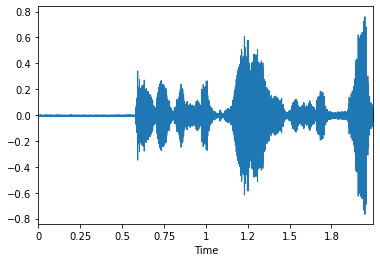

In [371]:
Data_Path = '/content/drive/My Drive/Speech Dataset/Libri_subset_Voice_conversion/174/'
x = []
y = []

duration = 2
with os.scandir(Data_Path) as entries:
  for entry in entries:
    if entry.is_dir():
      # count = count+1
      with os.scandir(entry) as files:
        for file_ in files:
          if file_.is_file():
            data,samplerate = librosa.load(file_,duration = duration)
            data, index = librosa.effects.trim(data)
            chroma_stft = librosa.feature.chroma_stft(y=data, sr=samplerate)
            rmse = librosa.feature.rms(y=data)
            spec_cent = librosa.feature.spectral_centroid(y=data, sr=samplerate)
            spec_bw = librosa.feature.spectral_bandwidth(y=data, sr=samplerate)
            rolloff = librosa.feature.spectral_rolloff(y=data, sr=samplerate)
            zcr = librosa.feature.zero_crossing_rate(data)
            mfcc = librosa.feature.mfcc(y=data, sr=samplerate)
            to_append = f'{file_.name} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
            for e in mfcc:
              to_append += f' {np.mean(e)}'
            to_append += f' {0}'
            file = open('dataset.csv', 'a', newline='')
            with file:
              writer = csv.writer(file)
              writer.writerow(to_append.split())
            x.append(np.array(mfcc))
            y.append([0,1])

librosa.display.waveplot(data,samplerate)


#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')

Data_Path = '/content/drive/My Drive/Speech Dataset/Libri_subset_Voice_conversion/84/'
with os.scandir(Data_Path) as entries:
  for entry in entries:
    if entry.is_dir():
      with os.scandir(entry) as files:
        for file_ in files:
          if file_.is_file():
            data,samplerate = librosa.load(file_,duration = duration)
            data, index = librosa.effects.trim(data)
            chroma_stft = librosa.feature.chroma_stft(y=data, sr=samplerate)
            rmse = librosa.feature.rms(y=data)
            spec_cent = librosa.feature.spectral_centroid(y=data, sr=samplerate)
            spec_bw = librosa.feature.spectral_bandwidth(y=data, sr=samplerate)
            rolloff = librosa.feature.spectral_rolloff(y=data, sr=samplerate)
            zcr = librosa.feature.zero_crossing_rate(data)
            mfcc = librosa.feature.mfcc(y=data, sr=samplerate)
            to_append = f'{file_.name} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
            for e in mfcc:
              to_append += f' {np.mean(e)}'
            to_append += f' {1}'
            file = open('dataset.csv', 'a', newline='')
            with file:
              writer = csv.writer(file)
              writer.writerow(to_append.split())
            x.append(np.array(mfcc))
            y.append([1,0])
            
# Open the first folder

# Assign label 1 to all the files

# Open second folder

# Assign label 2 to all the files



In [372]:
import pandas as pd
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
# print(len(header))
data = pd.read_csv('dataset.csv')
data.columns = header
data = data.drop(['filename'],axis = 1)

labels = data.iloc[:, -1]
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()

y = encoder.fit_transform(labels)
scaler = StandardScaler()
# print(data)
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

# x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# # Data_Path ='/content/drive/My Drive/Speech Dataset/Libri_subset_Voice_conversion/174/84280'
# # with os.scandir(Data_Path) as entries:
# #   for entry in entries:
# #     data, samplerate = sf.read(entry)
# #     x_test.append(data)
# #     y_test.append([0, 1])

# # Data_Path ='/content/drive/My Drive/Speech Dataset/Libri_subset_Voice_conversion/84/'
# # with os.scandir(Data_Path) as entries:
# #   for entry in entries:
# #     if entry.is_dir():
# #       count = 0
# #       with os.scandir(entry) as files:
# #         for file_ in files:
# #           count = count+1
# #           if file_.is_file() and count>24:
# #             y_test.append([1, 0])
# #             data,samplerate = sf.read(file_)
# #             x_test.append(data)
# print(x_train[0].shape)
# print(x_test.shape)


In [1]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train,y_train, epochs = 10, validation_data=(x_test,y_test))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Val_Loss over time")
plt.legend()
plt.show()

NameError: ignored